In [3]:
import pickle

import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from config import CLEANED_TARP_CSV_FILENAME, TEST_DATA_PERCENTAGE, MODEL_PICKLE_FILENAME

In [4]:
class_column = "status"

In [5]:
tarp_df = pd.read_csv(CLEANED_TARP_CSV_FILENAME)
tarp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23995 entries, 0 to 23994
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   soil_moisture    23995 non-null  int64  
 1   temperature      23995 non-null  int64  
 2   time             23995 non-null  int64  
 3   air_temperature  23995 non-null  float64
 4   air_humidity     23995 non-null  float64
 5   pressure         23995 non-null  float64
 6   status           23995 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.3 MB


In [6]:
x_train, x_test, y_train, y_test = train_test_split(tarp_df.drop(columns=[class_column]), tarp_df[class_column],
                                                    test_size=TEST_DATA_PERCENTAGE)

In [7]:
classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [8]:

y_pred_train = classifier.predict(x_train)
y_pred_test = classifier.predict(x_test)

In [9]:
confusion_matrix(y_train, y_pred_train)

array([[8308,  519],
       [ 929, 9440]])

In [10]:
confusion_matrix(y_test, y_pred_test)

array([[2008,  187],
       [ 269, 2335]])

In [11]:
f1_score(y_train, y_pred_train)

0.9287682014954742

In [12]:
f1_score(y_test, y_pred_test)

0.9110417479516192

In [13]:
with open(MODEL_PICKLE_FILENAME, "wb") as f:
	pickle.dump(classifier, f)

In [14]:
classifier.feature_importances_

array([0.22252821, 0.24018419, 0.52119302, 0.00506403, 0.00528939,
       0.00574116])

[Text(0.5070031712473573, 0.9545454545454546, 'x[2] <= 90.5\ngini = 0.497\nsamples = 19196\nvalue = [8827, 10369]'),
 Text(0.5027748414376322, 0.8636363636363636, 'x[0] <= 59.5\ngini = 0.45\nsamples = 15746\nvalue = [5377, 10369]'),
 Text(0.2718683932346723, 0.7727272727272727, 'x[1] <= 9.5\ngini = 0.319\nsamples = 10337\nvalue = [2055, 8282]'),
 Text(0.07954545454545454, 0.6818181818181818, 'x[0] <= 20.5\ngini = 0.5\nsamples = 2283\nvalue = [1161, 1122]'),
 Text(0.023255813953488372, 0.5909090909090909, 'x[2] <= 9.5\ngini = 0.368\nsamples = 752\nvalue = [183, 569]'),
 Text(0.019027484143763214, 0.5, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.02748414376321353, 0.5, 'x[2] <= 39.5\ngini = 0.23\nsamples = 656\nvalue = [87, 569]'),
 Text(0.023255813953488372, 0.4090909090909091, 'x[1] <= 1.5\ngini = 0.455\nsamples = 249\nvalue = [87, 162]'),
 Text(0.008456659619450317, 0.3181818181818182, 'x[1] <= 0.5\ngini = 0.145\nsamples = 51\nvalue = [47, 4]'),
 Text(0.004228329809725159, 0

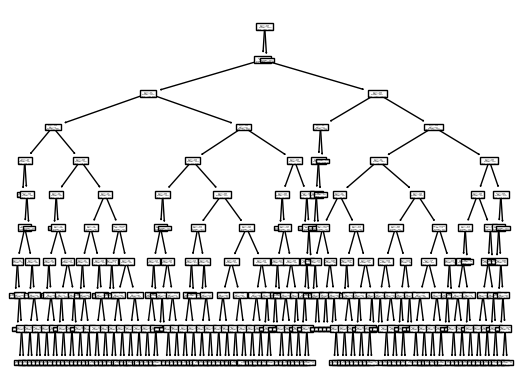

In [15]:
tree.plot_tree(classifier)